In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [29]:
dataset_train = pd.read_csv('trainset.csv')

In [30]:

dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [32]:
train_set = dataset_train.iloc[:,1:2].values

In [33]:
type(train_set)

numpy.ndarray

In [34]:
train_set.shape

(1259, 1)

In [35]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [36]:
training_set_scaled.shape

(1259, 1)

In [37]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [39]:
length = 60
n_features = 1

In [40]:
X_train.shape

(1199, 60)

In [43]:
model = Sequential()
model.add(layers.SimpleRNN(60,input_shape=(60,1)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 60)                3720      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,781
Trainable params: 3,781
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train1,y_train,epochs=100, batch_size=32)


Epoch 1/100
38/38 [==============================] - 2s 15ms/step - loss: 0.0070
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 6.6205e-04
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 5.6520e-04
Epoch 4/100
38/38 [==============================] - 1s 15ms/step - loss: 5.3652e-04
Epoch 5/100
38/38 [==============================] - 1s 15ms/step - loss: 4.9879e-04
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 4.6097e-04
Epoch 7/100
38/38 [==============================] - 1s 15ms/step - loss: 4.4518e-04
Epoch 8/100
38/38 [==============================] - 1s 15ms/step - loss: 4.0826e-04
Epoch 9/100
38/38 [==============================] - 1s 13ms/step - loss: 4.4063e-04
Epoch 10/100
38/38 [==============================] - 1s 14ms/step - loss: 4.5822e-04
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 3.7942e-04
Epoch 12/100
38/38 [==============================] - 1s 15ms/step 

In [45]:
dataset_test = pd.read_csv('testset.csv')

In [46]:
test_set = dataset_test.iloc[:,1:2].values

In [47]:

test_set.shape

(125, 1)

In [48]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [49]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))


In [50]:
X_test.shape

(1324, 60, 1)

In [51]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)


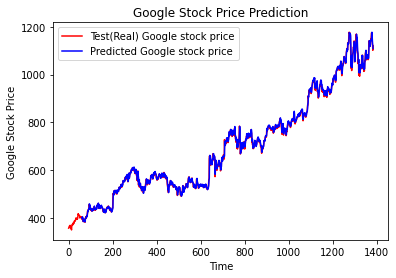